# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу, який зберегли наприкінці попередньої роботи (з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки з метою виявлення звязку між ними, побудувавши їх візуалізації. Візуально оцініть наявність та силу зв'язку між ознаками.
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
4. Побудувати діаграму розмаху для 'CO2 emission' по регіонам.
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам. Чи може регіон бути предиктором для кількості викидів СО2?


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки з метою виявлення зв'язку між ними, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [4]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path = 'clean_data2.csv'
df = pd.read_csv(path)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660


Будую діаграми

(0.0, 108413.44151272782)

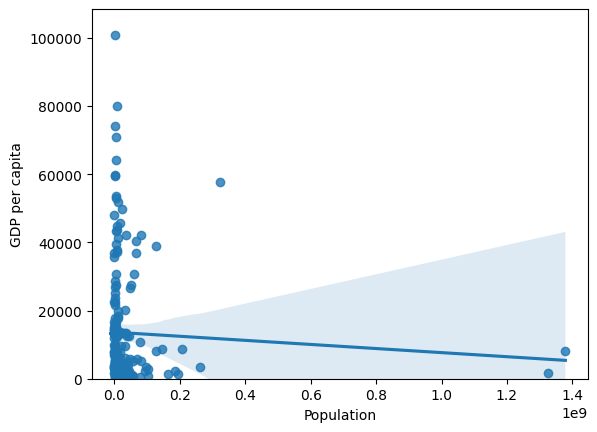

In [5]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
sns.regplot(x='Population', y='GDP per capita', data=df)
plt.ylim(0,)

(0.0, 11293002.850019475)

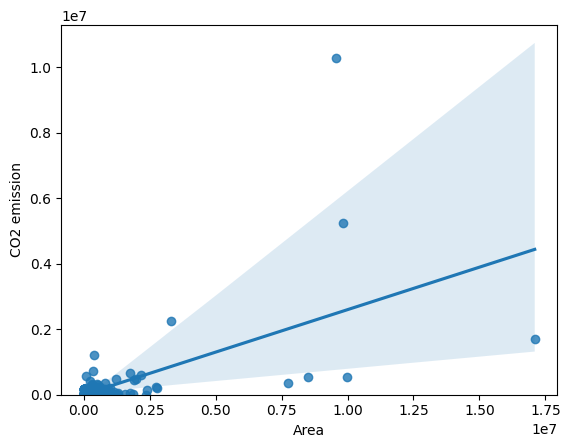

In [6]:
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)

(0.0, 12901844.524529332)

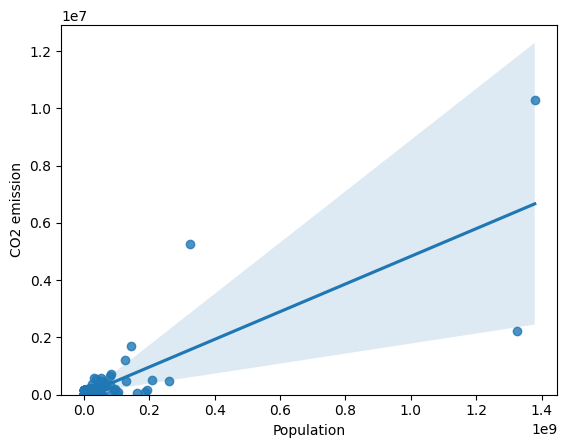

In [7]:
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)

Візуально оцінінюю наявність та силу зв'язку між  ознаками.

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

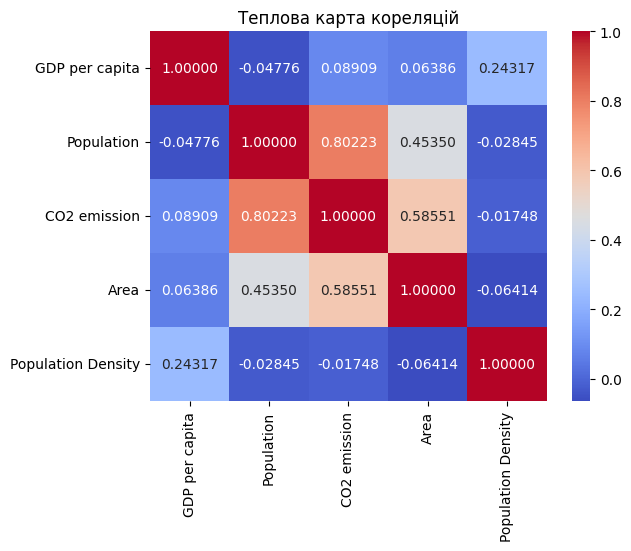

,GDP per capita,Population,CO2 emission,Area,Population Density
GDP per capita,1.000000,-0.047759,0.089094,0.063861,0.243174
Population,-0.047759,1.000000,0.802232,0.453500,-0.028449
CO2 emission,0.089094,0.802232,1.000000,0.585512,-0.017476
Area,0.063861,0.453500,0.585512,1.000000,-0.064138
Population Density,0.243174,-0.028449,-0.017476,-0.064138,1.000000


In [10]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Теплова карта кореляцій')
plt.show()

df.corr(numeric_only=True)

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Візуально оцінити наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

(0.0, 12014703.653513942)

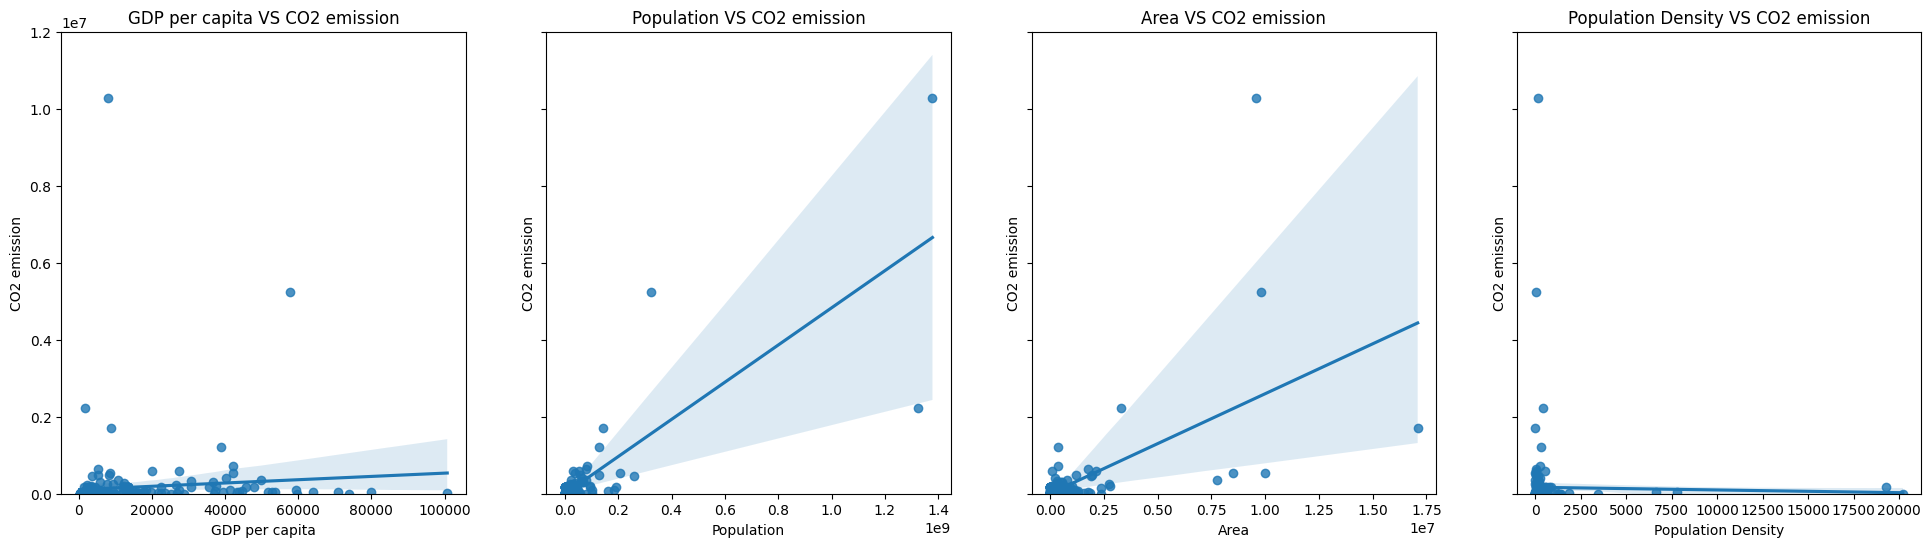

In [11]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
fig, axes = plt.subplots(1, 4, figsize=(24,6), sharey=True)
x_vars = ['GDP per capita', 'Population', 'Area', 'Population Density']
for ax, x_vars in zip(axes, x_vars):
    sns.regplot(x=x_vars, y='CO2 emission', data=df, ax=ax)
    ax.set_title(f'{x_vars} VS CO2 emission')
plt.ylim(0,)

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
<p>- Оскільки звʼязок між CO2 emission та GDP per capita не дуже виражений, доволі слабкий, що дає підставу вважати, що GDP per capita не є сильним та хорошим предиктором</p>
<p>- Звʼязки між Population та CO2 emission, Area та CO2 emession як ми бачимо на графіку є доволі сильним, хоч і у другому випадку звʼязок дещо слабший ніж у першому, проте цілком можна вважати, що Population та Area є хорошими предикторами CO2 emission</p>
<p>- Звʼязок між Population Density та CO2 emission є дуже слабкий, майже повністю відсутній, тому ознака Population Density не може слугувати предиктором CO2 emission</p>
<p>Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'</p>

In [12]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from scipy import stats

def pirson_corr(column):
    pearson_coef, p_value = stats.pearsonr(df[column], df['CO2 emission'])
    print(f'{column} VS CO2 emission')
    print('Pearson: {:.5f}'.format(pearson_coef))
    print('P-value: {:.5g}\n'.format(p_value))

numeric_df = df.select_dtypes(include='float64')
for column in numeric_df.columns:
    pirson_corr(column)

GDP per capita VS CO2 emission
Pearson: 0.08909
P-value: 0.19106

Population VS CO2 emission
Pearson: 0.80223
P-value: 4.6379e-50

CO2 emission VS CO2 emission
Pearson: 1.00000
P-value: 0

Area VS CO2 emission
Pearson: 0.58551
P-value: 2.3157e-21

Population Density VS CO2 emission
Pearson: -0.01748
P-value: 0.79797



Кількісні ознаки, які можуть бути предикторами кількості викидів СО2: Population та Area

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
</div>


<Axes: xlabel='Region', ylabel='CO2 emission'>

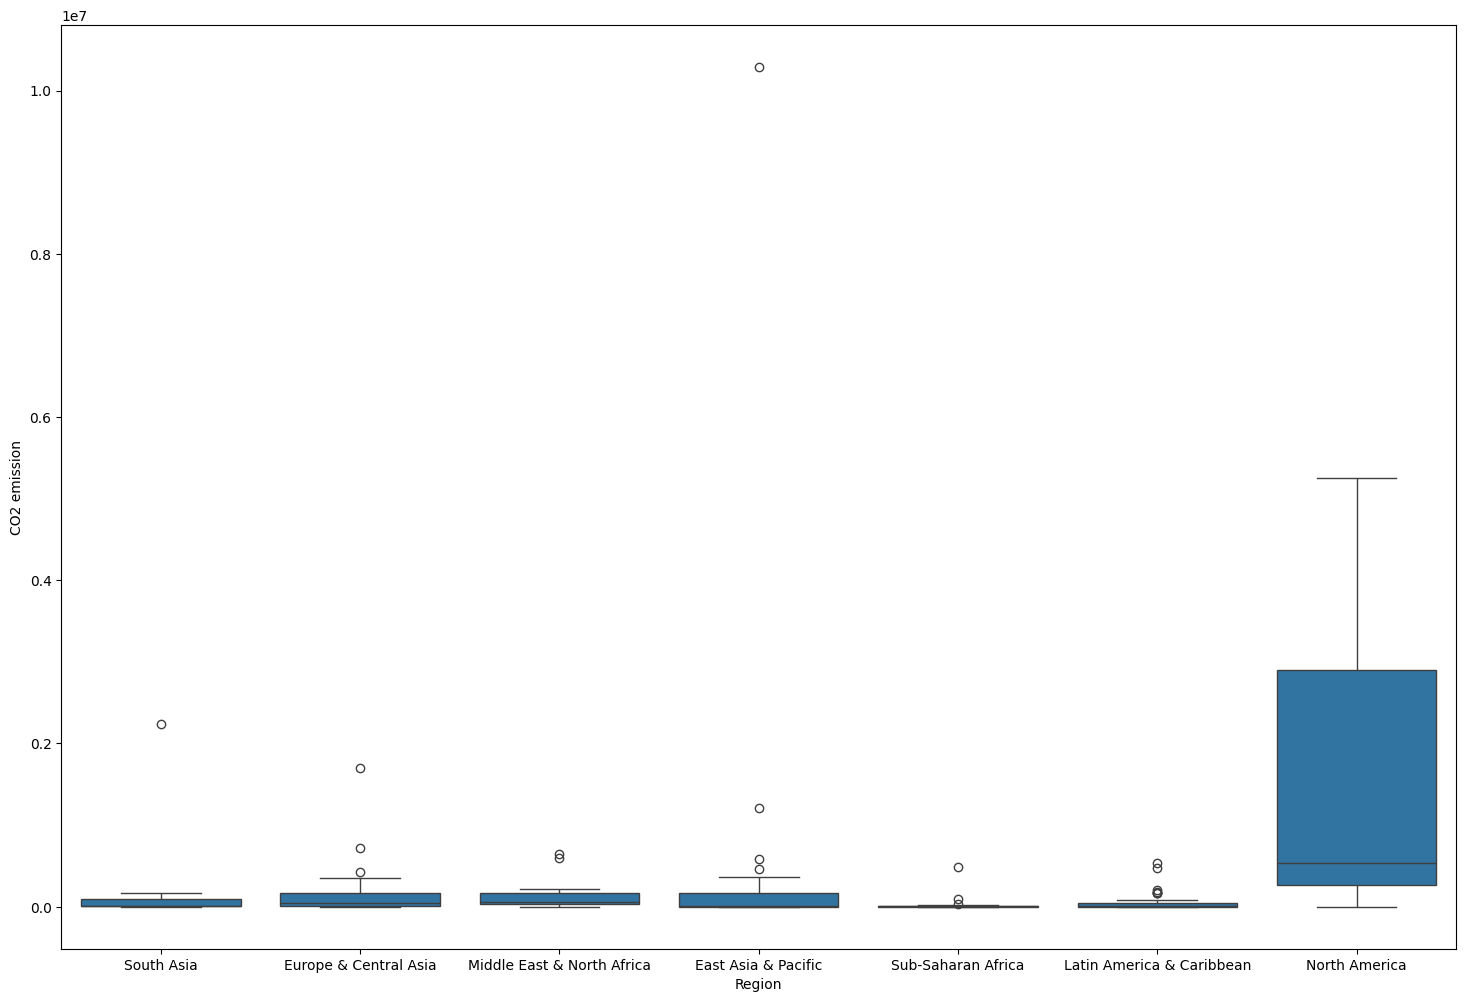

In [13]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(18,12))
sns.boxplot(x='Region', y='CO2 emission', data=df)

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [14]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
grouped_data = df.groupby('Region')['CO2 emission']
grouped_data.head(2)

0       9809.225000
1       5716.853000
2     145400.217000
3     165114.116337
4        462.042000
5      34763.160000
6        531.715000
7     204024.546000
10    361261.839000
14     31338.182000
15     73189.653000
20      6318.241000
21       575.719000
35    537193.498000
Name: CO2 emission, dtype: float64

Перевіряю розподіл даних в групах, щоб обрати вид дисперсійного аналізу.

Text(0.5, 1.0, 'Розподіл викидів CO2 за регіонами')

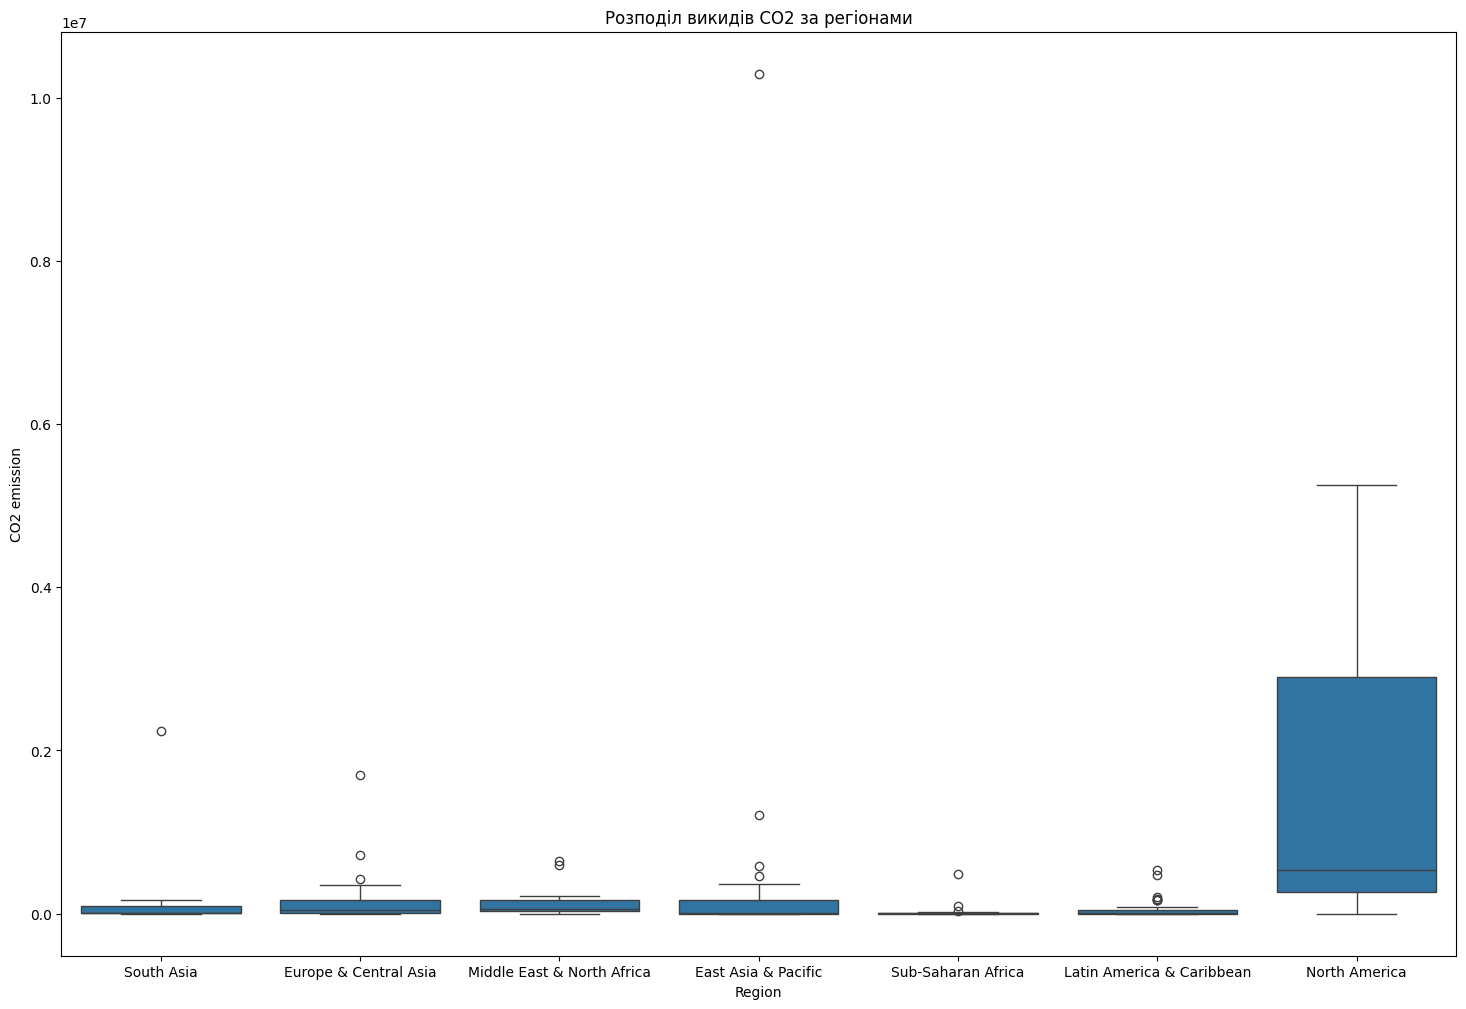

In [15]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(18,12))
sns.boxplot(x='Region', y='CO2 emission', data=df)
plt.title('Розподіл викидів CO2 за регіонами')

Для отримання F-test score та P-value скористаюсь функцією <code>f_oneway</code> з модуля "stats" , якщо розподіл даних в групах дозволяє застосувати класичний дисперсійний аналіз, або <code>kruskal</code> з модуля "stats" для непараметричного дисперсійного аналізу Краскела-Уоліса.

In [18]:
from scipy import stats

# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
f_test, p_value = stats.f_oneway(*grouped_data.apply(list))
print('F-statistic:', f_test)
print('P-value:', p_value)

F-statistic: 3.567709637673427
P-value: 0.0021855506878927533


Результат із F_test показником тесту, який показує сильну кореляцію, і P-value 0.0021 показує, що є статистична значущість. Але чи означає це, що досліджувані групи значуще відрізняються між собою?

Розглянемо їх окремо.

In [24]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
grouped_data_list = grouped_data.apply(list)
for i, region_item in enumerate(grouped_data_list.items()):
    region_name, region_data = region_item
    for region_name2, region_data2 in grouped_data_list[i:].items():
        if region_name != region_name2:
            f_statistic, p_value = stats.f_oneway(region_data, region_data2)
            print(f"\n{region_name} - {region_name2}:")
            print("F-statistic:", f_statistic)
            print("P-value:", p_value)


East Asia & Pacific - Europe & Central Asia:
F-statistic: 1.4425135894564018
P-value: 0.23278299644117736

East Asia & Pacific - Latin America & Caribbean:
F-statistic: 1.6466960216456297
P-value: 0.20325802138349333

East Asia & Pacific - Middle East & North Africa:
F-statistic: 0.4932685164852733
P-value: 0.48538208348892753

East Asia & Pacific - North America:
F-statistic: 2.0911315955888354
P-value: 0.1563544185723686

East Asia & Pacific - South Asia:
F-statistic: 0.015808885855581763
P-value: 0.90052900845297

East Asia & Pacific - Sub-Saharan Africa:
F-statistic: 2.3674674670688405
P-value: 0.1276917064867068

Europe & Central Asia - Latin America & Caribbean:
F-statistic: 2.456104756327821
P-value: 0.12029220254983197

Europe & Central Asia - Middle East & North Africa:
F-statistic: 0.025434686706224247
P-value: 0.8737062957355305

Europe & Central Asia - North America:
F-statistic: 27.185776372971752
P-value: 2.4871297063504576e-06

Europe & Central Asia - South Asia:
F-stat

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

In [28]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
max_f_stat = float('-inf')
pair = None
max_p_value = None

group_names = list(grouped_data.groups.keys())

for i, region1 in enumerate(group_names):
    group1 = grouped_data.get_group(region1)
    for j, region2 in enumerate(group_names[i+1:], start=i+1):
        group2 = grouped_data.get_group(region2)
        f_stat, p_value = stats.f_oneway(group1, group2)

        if f_stat > max_f_stat and p_value < 0.05:
            max_f_stat = f_stat
            pair = (region1, region2)
            max_p_value = p_value

print(pair)

('North America', 'Sub-Saharan Africa')


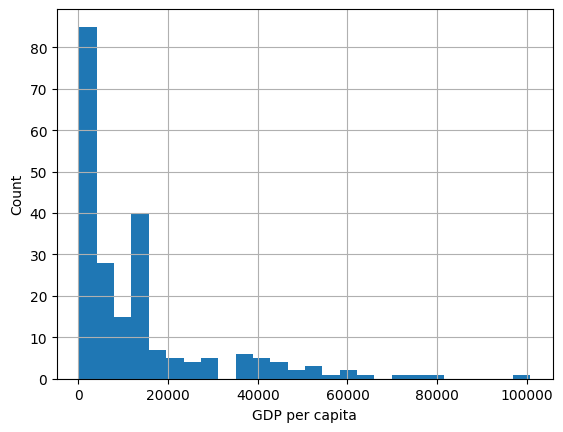

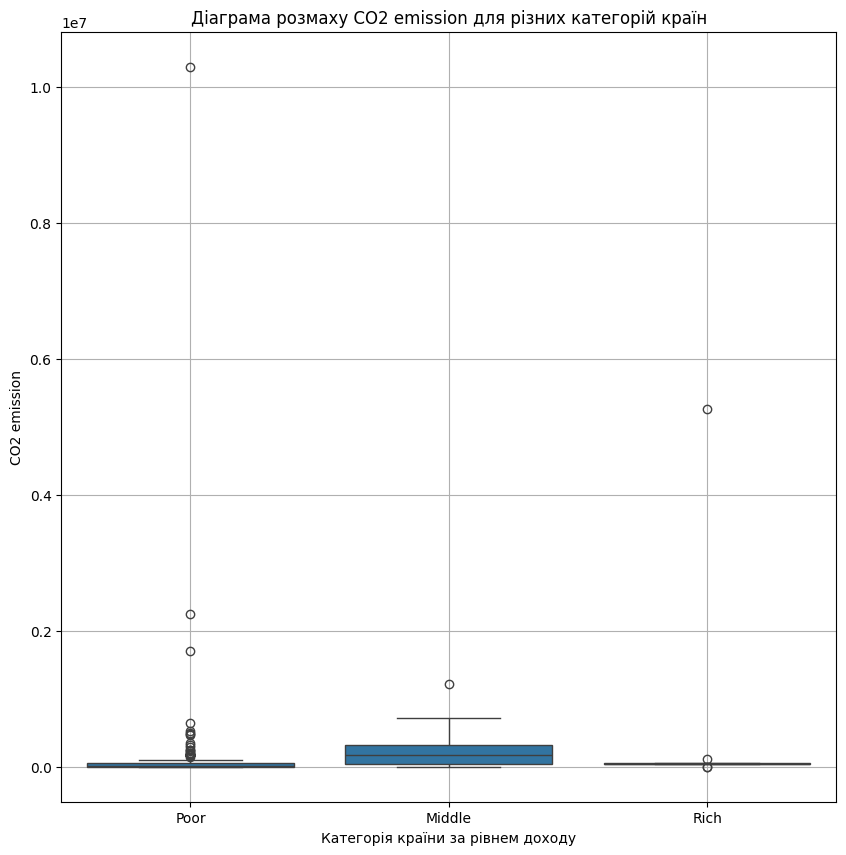

In [31]:
plt.hist(df['GDP per capita'], bins='auto')
plt.xlabel('GDP per capita')
plt.ylabel('Count')
plt.grid()

df['Rich country'] = pd.cut(df['GDP per capita'], bins=[0, 20000, 50000, 100000], labels=['Poor', 'Middle', 'Rich'])
plt.figure(figsize=(10,10))
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.xlabel('Категорія країни за рівнем доходу')
plt.ylabel('CO2 emission')
plt.title('Діаграма розмаху CO2 emission для різних категорій країн')
plt.grid()

In [35]:
grouped_data_rc = df.groupby('Rich country')['CO2 emission']
grouped_data_rc.head(2)

grouped_data_rc_list = grouped_data_rc.apply(list)
for i, category_item in enumerate(grouped_data_rc_list.items()):
    category_name, category_data = category_item
    for category_name2, category_data2 in grouped_data_rc_list[i:].items():
        if category_name != category_name2:
            f_statistic, p_value = stats.f_oneway(category_data, category_data2)
            print(f"\n{category_name} - {category_name2}:")
            print("F-statistic:", f_statistic)
            print("P-value:", p_value)


Poor - Middle:
F-statistic: 0.41187516710556965
P-value: 0.5217397374642805

Poor - Rich:
F-statistic: 2.326164229082135
P-value: 0.12893199615139667

Middle - Rich:
F-statistic: 1.1884298126489221
P-value: 0.28251135932174704


/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_1772/3767859783.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_rc = df.groupby('Rich country')['CO2 emission']


<h2>Виконав студент групи ІП-33 <br>Корольчук Олександр</h2>